In [1]:
from scipy.io import arff
import pandas as pd
import os
from sklearn import tree
from sklearn.metrics import accuracy_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pydot
import numpy as np

In [2]:
results = pd.DataFrame()
results_columns = pd.DataFrame()

for dirpath, dirnames, filenames in os.walk("../data_sets/data/", topdown=False):
    for name in filenames:
        fullpath = os.path.join(dirpath, name)
        data = pd.DataFrame(arff.loadarff(fullpath)[0])
        data['class'] = data['class'].str.decode('utf-8')
        data['year'] = float(name[0])
        results = pd.concat([results,data],axis=0).reset_index(drop=True)
        
                

In [3]:
#sort by year
results = results.sort_values(by=['year'])

In [4]:
results.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,year
43404,0.014946,0.946480,0.03211,1.03630,-20.5810,0.000000,0.015260,0.056357,2.96940,0.053341,...,0.28021,0.97443,1.179200,15.0360,4.1741,108.640,3.3599,35.11800,1,1.0
38710,-0.083327,0.942880,-0.17625,0.69310,-92.9120,-0.095666,-0.078056,-0.005651,0.87141,-0.005328,...,15.64000,1.14760,-69.182000,18.4010,2.1509,278.570,1.3103,1.25010,0,1.0
38711,0.161240,0.657540,0.15056,1.45130,-9.5086,0.498510,0.206490,0.498930,1.10840,0.328070,...,0.49147,0.90223,0.987410,10.7320,10.0460,56.648,6.4433,4.16700,0,1.0
38712,0.031386,0.038397,0.19497,6.12450,358.7300,0.010658,0.031643,25.044000,1.18860,0.961600,...,0.03264,0.84130,0.000365,5.3563,2.8605,66.169,5.5162,0.27362,0,1.0
38713,-0.092135,1.132700,-0.19627,0.82672,-99.4520,-0.140320,-0.092135,-0.117120,0.95725,-0.132660,...,0.69452,1.04470,0.000000,5.9660,2.9435,252.190,1.4473,25.77400,0,1.0


In [5]:
results.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43405 entries, 43404 to 21702
Data columns (total 66 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   43397 non-null  float64
 1   Attr2   43397 non-null  float64
 2   Attr3   43397 non-null  float64
 3   Attr4   43271 non-null  float64
 4   Attr5   43316 non-null  float64
 5   Attr6   43397 non-null  float64
 6   Attr7   43397 non-null  float64
 7   Attr8   43311 non-null  float64
 8   Attr9   43396 non-null  float64
 9   Attr10  43397 non-null  float64
 10  Attr11  43361 non-null  float64
 11  Attr12  43271 non-null  float64
 12  Attr13  43278 non-null  float64
 13  Attr14  43397 non-null  float64
 14  Attr15  43369 non-null  float64
 15  Attr16  43310 non-null  float64
 16  Attr17  43311 non-null  float64
 17  Attr18  43397 non-null  float64
 18  Attr19  43277 non-null  float64
 19  Attr20  43278 non-null  float64
 20  Attr21  37551 non-null  float64
 21  Attr22  43397 non-null  float64

In [6]:
missing_cols = results.columns[results.isnull().any()]

In [7]:
results.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,year
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,...,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000,43405.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592,2.939753
std,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,14.670597,...,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2369.339482,1.283975
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,1.000000
25%,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,...,9.348500e-03,0.014649,8.753200e-01,0.000000,5.545500e+00,4.510150,4.214400e+01,3.097650,2.176800,2.000000
50%,0.049660,0.471900,0.196610,1.569800,-1.034500e+00,0.000000,0.059634,1.070400,1.195350,0.505970,...,5.294300e-02,0.119670,9.509600e-01,0.006366,9.791700e+00,6.636300,7.132600e+01,5.087600,4.282500,3.000000
75%,0.129580,0.688320,0.403390,2.787450,5.063425e+01,0.089446,0.150880,2.615700,2.062500,0.709100,...,1.290975e-01,0.284605,9.926400e-01,0.236052,2.018100e+01,10.394500,1.172200e+02,8.598850,9.776200,4.000000
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,5.000000


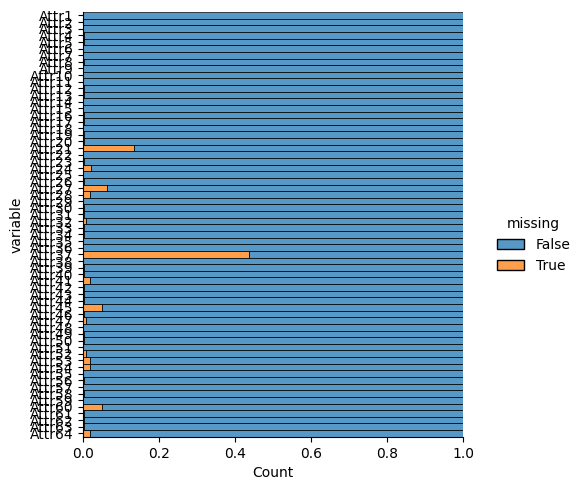

In [25]:

sns.displot(
    data=results[missing_cols].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill"
);

***
# Impute missing data

In [9]:
mean_imp = SimpleImputer(missing_values = pd.NA,strategy='mean')
median_imp = SimpleImputer(missing_values = pd.NA,strategy = 'median')
freq_imp = SimpleImputer(missing_values = pd.NA,strategy = 'most_frequent')

In [10]:
df_impute = results


df_mean = pd.DataFrame(mean_imp.fit_transform(df_impute),columns = df_impute.columns)
df_median = pd.DataFrame(median_imp.fit_transform(df_impute),columns = df_impute.columns)
df_freq = pd.DataFrame(freq_imp.fit_transform(df_impute),columns = df_impute.columns)

# Begin Modeling

In [11]:

X = df_mean.loc[:, df_mean.columns != 'class']
y = df_mean['class']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=False,
                                                    random_state=0)

In [19]:
model = RandomForestClassifier(random_state=0,n_jobs=-1)

# Train the model on training data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [20]:
model_results=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
model_results

,Actual,Predicted
34724,0.0,0.0
34725,0.0,0.0
34726,0.0,0.0
34727,0.0,0.0
34728,0.0,0.0
...,...,...
43400,0.0,0.0
43401,0.0,0.0
43402,0.0,0.0
43403,0.0,0.0


In [21]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.033175901393848635
Mean Squared Error: 0.033175901393848635
Root Mean Squared Error: 0.18214253043660242


In [22]:

accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:', round(accuracy, 2), '%')

Accuracy: 0.97 %.


/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


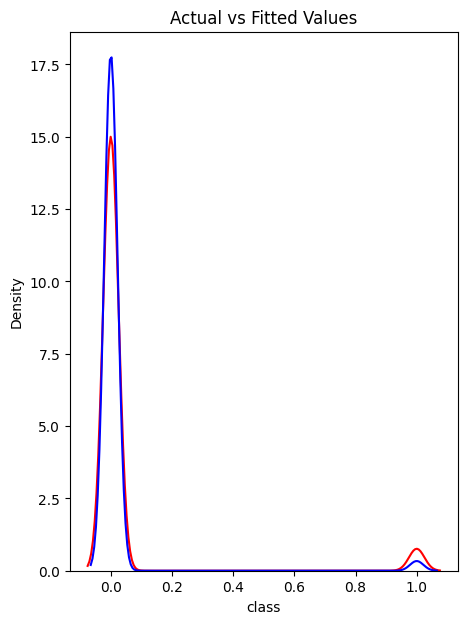

In [23]:

plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values')


plt.show()
plt.close()

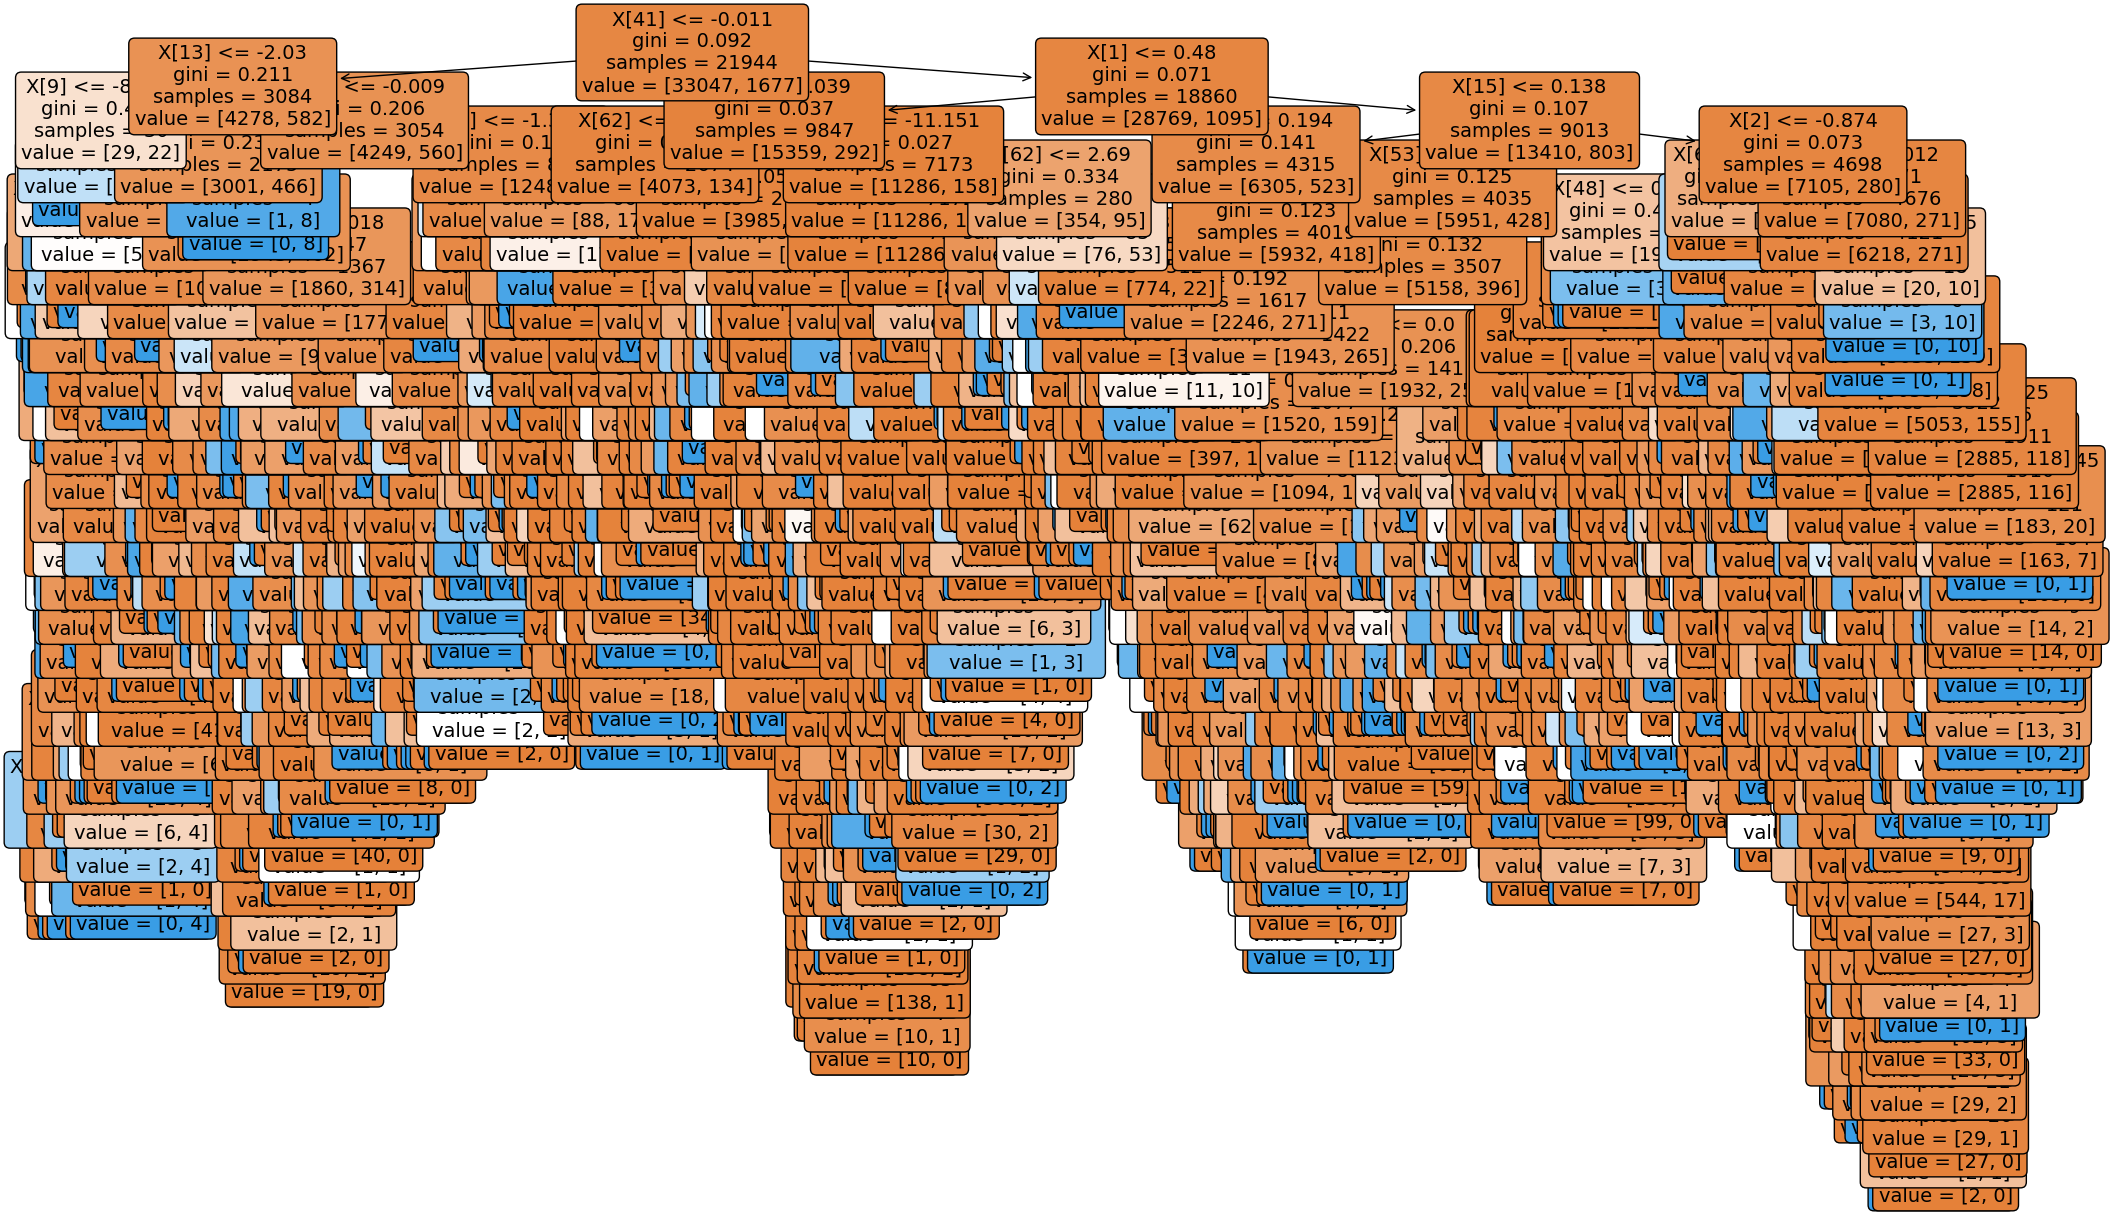

In [24]:

# Pull out one tree from the forest
Tree =  model.estimators_[5]
# Export the image to a dot file

plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);